<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Decision Tree**

## **Decision Tree Basics**

A **Decision Tree** is a non-parametric **supervised learning** algorithm. A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both **classification and regression**. Decision tree learning employs a **divide and conquer strategy** by conducting a **greedy search** to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels.

**Decision Tree consists of:**

* **Nodes :** Test for the value of a certain attribute.
* **Edges/ Branch :** Correspond to the outcome of a test and connect to the next node or leaf.
* **Leaf nodes :** Terminal nodes that predict the outcome (represent class labels or class distribution).

## **Splitting Criteria**

### **Reduction in Variance**

**Reduction in Variance** is a method for splitting the node used when the target variable is **continuous**, i.e., **regression problems**. It is so-called because it uses variance as a measure for deciding the feature on which node is split into child nodes.

$$\mathrm{Variance} = \frac{\sum(X-\mu)^{2}}{N}$$

Variance is used for calculating the homogeneity of a node. If a node is entirely homogeneous, then the variance is zero.

### **Sum of Squared Error (SSE)**

The **Sum of Squared Error** is the most widely used splitting metric for **regression**. Suppose you want to divide the data set $S$ into two groups of $S_{1}$ and $S_{2}$, where the selection of $S_{1}$ and $S_{2}$ needs to minimize the sum of squared errors:

$$\mathrm{SSE} = \sum_{i \in S_{1}}(y_{i}-ȳ_{1})^{2}+\sum_{i \in S_{2}}(y_{i}-ȳ_{2})^{2}$$

The way regression tree grows is to automatically decide on the splitting variables and split points that can **maximize SSE reduction**. Since this process is essentially a recursive segmentation, this approach is also called **recursive partitioning**.

### **Information Gain (IG)**

**Information Gain** is used for splitting the nodes when the target variable is categorical. It works on the concept of the entropy and is given by:

$$\mathrm{Information \ Gain} = 1 - \mathrm{Entroy}$$

where $\mathrm{Entropy}$ is a measure of the degree of disorder which is defined as:

$$\mathrm{Entroy} = -\sum_{i}^{n}p_{i}\log_{2}p_{i}$$

$p_{i}$ is the probability of class $i$ and the interval of entropy is $[0,1]$. For a two-class problem:

$$\mathrm{Entroy} = -p\log_{2}p-(1-p)\log_{2}(1-p)$$

**Lower the value of entropy, higher is the purity of the node**. The entropy of a homogeneous node is zero. Since we subtract entropy from 1, the **Information Gain is higher for the purer nodes** with a maximum value of 1.

### **Gini Impurity**

**Gini Impurity** is a measure of non-homogeneity. It is widely used in classification tree. **Gini** is the probability of correctly labeling a randomly chosen element if it was randomly labeled according to the distribution of labels in the node. The formula for Gini is:

$$\mathrm{Gini} = \sum_{i}p_{i}^{2}$$


And **Gini Impurity** is defined as:

$$\mathrm{Gini \ Impurity}(D) = 1 - \mathrm{Gini} = 1 - \sum_{i}p_{i}^{2} = \sum_{i}p_{i}(1-p_{i})$$

where $p_{i}$ is the probability of class $i$ and the interval of Gini is $[0,0.5]$. For a two-class problem, the Gini impurity for a given node is:

$$p_{1}(1-p_{1}) + p_{2}(1-p_{2})$$

It is easy to see that when the sample set is **pure**, one of the probability is 0 and the Gini score is the **smallest**. Conversely, when $p_{1} = p_{2} = 0.5$ the Gini score is the **largest**, in which case the purity of the node is the smallest.

## **Tree Pruning**

**Pruning** is the process that reduces the size of decision trees. It **reduces the risk of overfitting** by limiting the size of the tree or removing sections of the tree that provide little power.

### **Limit the Size**
We can limit the tree size by setting some parameters.

* **Minimum sample size at each node**: Defining the minimum sample size at the node helps to prevent the leaf nodes having only one sample.
* **Maximum depth of the tree**: If the tree grows too deep, the model tends to over-fit.
* **Maximum number of terminal nodes**: Limit on the terminal nodes works the same as the limit on the depth of the tree.
* **The number of variables considered for each split**: the algorithm randomly selects variables used in finding the optimal split point at each level. In general, the square root of the number of all variables works best, which is also the default setting for many functions.

### **Remove Branches**

Another way is to first let the tree grow **as much as possible** and then go back to remove insignificant branches. The process reduces the depth of the tree. The idea is to overfit the training set and then correct using cross-validation.


**Cost/Complexity Penalty**

The idea is that the pruning minimizes the penalized error $\mathrm{SSE}_{\alpha}$ with a certain value of tuning parameter $\alpha$.

$$\mathrm{SSE}_{\alpha} = \mathrm{SSE} + \alpha \cdot \mathrm{complexity}$$

Here complexity is a function of the number of leaves. For every given $\alpha$, we want to find the tree that minimizes this penalized error.

## **Dataset Initialization**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [217]:
np.random.seed(0)

# radius of the circle
circle_r = 1

# center of the circle (x, y)
circle_x_1, circle_y_1 = 1, 1
circle_x_2, circle_y_2 = 3, 1.5
circle_x_3, circle_y_3 = 5, 2

# random angle
alpha_1 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_2 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_3 = 2 * np.math.pi * np.random.rand(50, 1) 

# random radius
r_1 = circle_r * np.sqrt(np.random.rand(50, 1))
r_2 = circle_r * np.sqrt(np.random.rand(50, 1))
r_3 = circle_r * np.sqrt(np.random.rand(50, 1))

# calculating coordinates
x_1, y_1 = r_1 * np.cos(alpha_1) + circle_x_1, r_1 * np.sin(alpha_1) + circle_y_1
x_2, y_2 = r_2 * np.cos(alpha_2) + circle_x_2, r_2 * np.sin(alpha_2) + circle_y_2
x_3, y_3 = r_3 * np.cos(alpha_3) + circle_x_3, r_3 * np.sin(alpha_3) + circle_y_3

In [218]:
class_1, class_2, class_3 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1), np.concatenate((x_3, y_3), axis=1)
zeros, ones, twos = np.zeros((50,1)), np.ones((50,1)), np.ones((50,1))*2
x = np.concatenate((class_1, class_2, class_3), axis=0)
y = np.concatenate((zeros, ones, twos), axis=0).ravel()

Text(0, 0.5, 'Y')

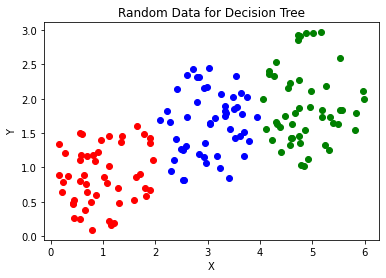

In [219]:
fig, ax = plt.subplots() 
ax.scatter(x[:,0][y==0], x[:,1][y==0], c='r')
ax.scatter(x[:,0][y==1], x[:,1][y==1], c='b')
ax.scatter(x[:,0][y==2], x[:,1][y==2], c='g')
ax.set_title('Random Data for Decision Tree')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

In [220]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## **Implementing Decision Tree from scratch**

In [171]:
class Node:
    def __init__(self, gini_index, samples, samples_in_classes, predicted_class):
        self.gini_index = gini_index
        self.samples = samples
        self.samples_in_classes = samples_in_classes
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [185]:
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
    
    def fit(self, x, y):
        self.classes = len(set(y))
        self.features = x.shape[1]
        self.tree = self.grow_tree(x, y)
    
    def gini_function(self, y):
        m = y.shape[0]
        return 1 - sum((np.sum(y == c) / m)**2 for c in range(self.classes))
    
    def grow_tree(self, x, y, curr_depth=0):
        samples_in_classes = [np.sum(y == i) for i in range(self.classes)]
        predicted_class = np.argmax(samples_in_classes)
        node = Node(
            gini_index=self.gini_function(y),
            samples=y.shape[0],
            samples_in_classes=samples_in_classes,
            predicted_class=predicted_class
            )
        
        if curr_depth < self.max_depth:
            idx, thr = self.best_split(x, y)
            if idx is not None:
                indices_left = x[:, idx] < thr
                x_left, y_left = x[indices_left], y[indices_left]
                x_right, y_right = x[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self.grow_tree(x_left, y_left, curr_depth + 1)
                node.right = self.grow_tree(x_right, y_right, curr_depth + 1)

        return node
    
    def best_split(self, x, y):
        m = y.shape[0]
        if m <= 1:
            return None, None

        best_gini = self.gini_function(y)
        best_idx, best_thr = None, None

        for idx in range(self.features):
            thresholds, classes = zip(*sorted(zip(x[:, idx], y)))
            num_left = [0] * self.classes
            num_right = [np.sum(y == c) for c in range(self.classes)]

            for i in range(1, m): 
                c = int(classes[i - 1])
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1 - sum((num_left[x] / i) ** 2 for x in range(self.classes))
                gini_right = 1 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.classes))
                gini = (i * gini_left + (m - i) * gini_right) / m

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  
        
        return best_idx, best_thr

    def predict(self, x):
        return [self.predict_input(inputs) for inputs in x]

    def predict_input(self, x):
        node = self.tree
        while(node.left):
            if x[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [232]:
decision_tree = DecisionTree(max_depth=3)
decision_tree.fit(x_train, y_train)

In [233]:
y_pred = decision_tree.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

1.0

In [234]:
def print_tree(tree, index):
    if(tree):
        print("Depth:", index, "Samples:", tree.samples, "Gini:", tree.gini_index, 
              "Feature:", tree.feature_index,"Threshold:", tree.threshold, "Values:", tree.samples_in_classes)
        print_tree(tree.left, index+1)
        print_tree(tree.right, index+1)

In [226]:
print_tree(decision_tree.tree, 1)

Depth: 1 Samples: 112 Gini: 0.6662946428571428 Feature: 0 Threshold: 2.0218622599514804 Values: [37, 39, 36]
Depth: 2 Samples: 37 Gini: 0.0 Feature: 0 Threshold: 0 Values: [37, 0, 0]
Depth: 2 Samples: 75 Gini: 0.4992 Feature: 0 Threshold: 4.005242242727981 Values: [0, 39, 36]
Depth: 3 Samples: 39 Gini: 0.0 Feature: 0 Threshold: 0 Values: [0, 39, 0]
Depth: 3 Samples: 36 Gini: 0.0 Feature: 0 Threshold: 0 Values: [0, 0, 36]


## **Implementing Decision Tree from sklearn**

### **Classification Case**

In [227]:
from sklearn import tree
from sklearn import metrics

In [228]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

1.0

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.022\ngini = 0.666\nsamples = 112\nvalue = [37, 39, 36]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 4.005\ngini = 0.499\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

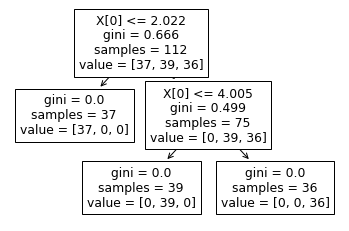

In [229]:
tree.plot_tree(clf)

### **Regression Case**

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [38]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

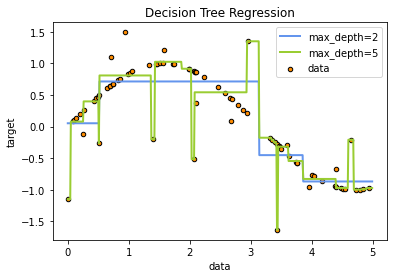

In [39]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Decision_Tree.ipynb